Importing environment, state process function and DQN solver function

In [1]:
from puckworld import DQNSolver, puckworld

Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


Puck World Implementation

function to convert game state to np array

In [2]:
from math import atan2, sqrt
import numpy as np
import pandas as pd
    
def process_state(state):
    
    good_range = sqrt((state['player_x'] - state['good_creep_x'])**2 + (state['player_y'] - state['good_creep_y'])**2)
    
    bad_range = sqrt((state['player_x'] - state['bad_creep_x'])**2 + (state['player_y'] - state['bad_creep_y'])**2)
    
    range_vec = np.append(good_range, bad_range) // 1
    
    good_bearing = -atan2((state['good_creep_x'] - state['player_x']), state['good_creep_y']) - (state['player_y'])
    
    bad_bearing = -atan2((state['good_creep_x'] - state['player_x']), (state['good_creep_y']) - (state['player_y']))
    
    bearing_vec = np.append(good_bearing, bad_bearing).round(decimals = 2)
    
    state_vec = np.concatenate([range_vec, bearing_vec])
    
    return state_vec

In [ ]:
puckworld(process_state = process_state, display = True, solved_score = -15000, solved_runs = 10, max_runs = 100)













Run: 0, exploration: 0.1596942577016785, score: -137803.95965313376
Run: 1, exploration: 0.12436223747532126, score: -157022.46173197316
Run: 2, exploration: 0.09684735276305202, score: -127385.30640060263
Run: 3, exploration: 0.07542007869609381, score: -133361.5465733821
Run: 4, exploration: 0.05873354416244883, score: -52493.03358082601
Run: 5, exploration: 0.045738870464225485, score: -168335.67972847598
Run: 6, exploration: 0.03561924111980877, score: -148218.91417857667
Run: 7, exploration: 0.027738558584287917, score: -128463.61140328192
Run: 8, exploration: 0.021601460563012247, score: -175488.91192025086
Run: 9, exploration: 0.016822182632073943, score: -129292.75263717468
Run: 10, exploration: 0.013100309938828875, score: -66737.12685844372
Run: 11, exploration: 0.01020189378791811, score: -87003.64700215659
Run: 12, exploration: 0.01, score: -167456.68608703022
Run: 13, exploration: 0.01, score: -107942.86477645021
Run: 14, exploration: 0.01, score: -70418.274580

/Applications/anaconda3/envs/rl/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140130). Check your callbacks.
  % delta_t_median)


Run: 24, exploration: 0.01, score: -57905.120441449806
Run: 25, exploration: 0.01, score: -66096.64291516365
Run: 26, exploration: 0.01, score: -200109.67889329419
Run: 27, exploration: 0.01, score: -107122.97313466808
Run: 28, exploration: 0.01, score: -112879.7374708103
Run: 29, exploration: 0.01, score: -240743.72244541952
Run: 30, exploration: 0.01, score: -166424.3097348339
Run: 31, exploration: 0.01, score: -110881.75938510103
Run: 32, exploration: 0.01, score: -123580.67015207047
Run: 33, exploration: 0.01, score: -193034.7330565285
Run: 34, exploration: 0.01, score: -51295.70798157435
Run: 35, exploration: 0.01, score: -216541.7970398292
Run: 36, exploration: 0.01, score: -67344.89742281754
Run: 37, exploration: 0.01, score: -128048.66761022527
Run: 38, exploration: 0.01, score: -125984.10055053234
Run: 39, exploration: 0.01, score: -186845.98214948736
Run: 40, exploration: 0.01, score: -168886.72154466435
Run: 41, exploration: 0.01, score: -180271.59963388462
Run: 42, explorat

Evaluate trained model

In [9]:
import pickle

with open('solved.model', 'rb') as solved_model:
    
    puckworld_model = pickle.load(solved_model)

    print('loaded: ' + str(puckworld_model))


loaded: <puckworld.DQNSolver object at 0x663204450>


In [ ]:
puckworld_model.model.summary()

In [10]:
from ple.games.puckworld import PuckWorld
from ple import PLE

game = PuckWorld(width=500, height=500)
p = PLE(game, display_screen=True, state_preprocessor=process_state)
observation_space = p.state_dim[0]
action_space = len(p.getActionSet())

p.init()
nb_frames = 10000
reward = 0.0
rewards = []
for i in range(nb_frames):
    if p.game_over():
        p.reset_game()
    state = np.reshape(p.getGameState(), [1, observation_space])
    agent_action = puckworld_model.act(state)
    action = p.getActionSet()[puckworld_model.act(state)]
    #action = rng.choice([119, 97, 100, 115])
    reward = p.act(action)

SystemExit: 

/Applications/anaconda3/envs/rl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

puck_results = pd.read_csv('results.csv')
puck_results['25-MA'] = puck_results['rewards'].rolling(window=25).mean()
puck_results['1000-MA'] = puck_results['rewards'].rolling(window=1000).mean()

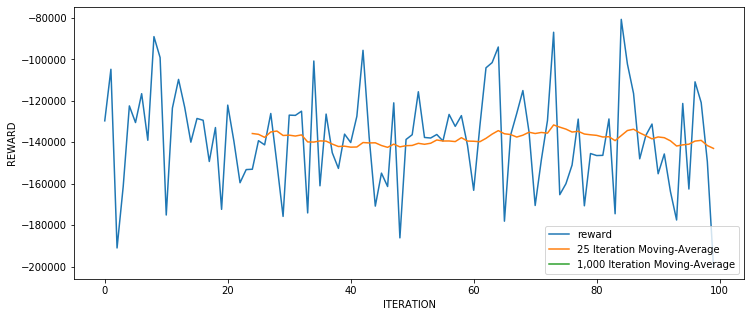

In [5]:
plt.figure(figsize=(12,5))
plt.xlabel('ITERATION')
plt.ylabel('REWARD')
plt.plot(puck_results['rewards'], label = 'reward')
plt.plot(puck_results['25-MA'], label = '25 Iteration Moving-Average')
plt.plot(puck_results['1000-MA'], label = '1,000 Iteration Moving-Average')
plt.legend(loc="lower right")
#plt.savefig('./puckworld_3.png')